# Bank Customer Churn Analysis

Churner is generally defined as a customer who stops using a product or service for a given period of time.

This notebook is to do the data analysis and predictions on the churn.csv file.

The first step in the Data Preprocessing is to import the libraries, load the data and do some Exploratory Data Analysis (EDA).


#### STEP1 - Import all important Libraries and dataset

In [2]:
import pandas as pd    #for EDA
import numpy as np     #for numerical operation if required
from pySankey.sankey import sankey   #for sankey plot
import matplotlib.pyplot as plt      #for visualization

import seaborn as sns
%matplotlib inline
dataset=pd.read_csv(r'/home/ajaygoswami/Documents/Bobby/DATA SET/churn.csv')
#importing dataset and put it in a variable called dataset
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 1. Exploratory Data Analysis

In [2]:
dataset.info()  #for dataset information

#dataset.head()
dataset.shape  #understanding the shape of our dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


(10000, 14)

In [3]:
dataset.isna().sum()  #finding all the null values as per each column

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
dataset.describe() #for descriptive information(statical)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
round(dataset.describe(),2)  
#'''rounding off all the decimal values up-to 2 place'''

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,5000.50,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,2886.90,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,1.00,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,2500.75,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,5000.50,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,7500.25,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,10000.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


In [6]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
exit=dataset[dataset["Exited"]==1]
exit

#'''exit = ONLY ROWS WHERE Exited == 1'''

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [8]:
notexit=dataset[dataset["Exited"] ==0]
notexit
#'''notexit = ONLY ROWS WHERE Exited == 0'''

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


In [9]:
#notexit["Surname"]

#return all the Surname values of notexit

In [10]:
notexit[["Surname","CreditScore","Balance"]]
#Return given columns of notexit

,Surname,CreditScore,Balance
1,Hill,608,83807.86
3,Boni,699,0.00
4,Mitchell,850,125510.82
6,Bartlett,822,0.00
8,He,501,142051.07
...,...,...,...
9993,Rahman,644,155060.41
9994,Wood,800,0.00
9995,Obijiaku,771,0.00
9996,Johnstone,516,57369.61


##### calculating Exited and not_exited client 

In [11]:
exited=len(dataset[dataset["Exited"] ==0])
notexited=len(dataset[dataset["Exited"] ==1])
print("length of exited persons :- {}".format(exited))
#return length of exited persons
print("length of exited persons :- {}".format(notexited))
#return length of notexited persons

length of exited persons :- 7963
length of exited persons :- 2037


In [12]:
exited_perc=round(exited/len(dataset)*100,2)
notexited_perc=round(notexited/len(dataset)*100,2)

#finding the percentage of exited and notexited persons from the length of whole dataset 
#and rounded of its decimal value up to 2 place

print("Exited :- {} %".format(exited_perc))
print("Not-exited :- {} %".format(notexited_perc))

Exited :- 79.63 %
Not-exited :- 20.37 %


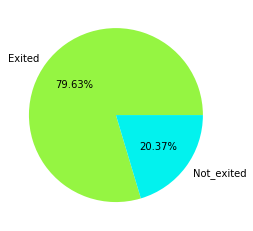

In [13]:
#plotting Exited and not_exited persons as per ratio
labels=["Exited","Not_exited"]
data = [exited_perc,notexited_perc]
colors=["#95f542","#02f2ee"]
plt.pie(data, 
        labels = labels,
        colors=colors,
        autopct="%0.2f%%")            # after point. numbers
plt.show()

###### So, around of 20% of the clients exited the bank, while around 80% stayed. As the goal here is to identify which of the customers are at higher risk to discontinue their services with the bank, we are dealing with a classification problem.

important point to take into consideration here is that we are dealing with an imbalanced dataset.


In [14]:
country = list(dataset["Geography"].unique()) 
gender = list(dataset["Gender"].unique())

#finding the unique values of country and gender wih ".unique()/.nunique()" methods

print(country)
print(gender)

['France', 'Spain', 'Germany']
['Female', 'Male']


In [15]:
dataset["Exited_str"]=dataset["Exited"]
dataset["Exited_str"]=dataset["Exited_str"].map({1:'Exited',0:"Stayed"})
#creating a new column with the help of "Exited" column where numeric values(0,1) converted as-
#..................string values(stayed,exited))repectively

dataset["Exited_str"]

0       Exited
1       Stayed
2       Exited
3       Stayed
4       Stayed
         ...  
9995    Stayed
9996    Stayed
9997    Exited
9998    Exited
9999    Stayed
Name: Exited_str, Length: 10000, dtype: object

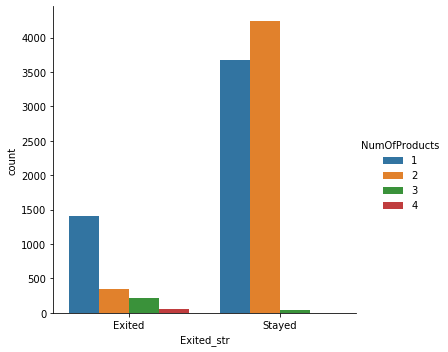

In [16]:
sns.catplot("Exited_str",data=dataset,kind="count",hue="NumOfProducts")

Here we can see that those clients who consist one product exited the most and other side who has2 product has mazority in stayed clients.

In [17]:
'''We can also convert other modified column with the help of given columns'''
#exampole:-
#dataset["Geography_str"]=dataset["Geography"]
#dataset["Geography_str"]=dataset["Geography_str"].map({'Spain':'Spa','France':"Fra",'Germany':'Ger'})
#dataset["Geography_str"]

'We can also convert other modified column with the help of given columns'

In [18]:
gender_count=dataset["Gender"].value_counts() 
#return different categorical values of gender column
gender_count

Male      5457
Female    4543
Name: Gender, dtype: int64

In [19]:
gender_pct=gender_count/len(dataset.index) *100    #(ratio/percentage)
gender_pct

Male      54.57
Female    45.43
Name: Gender, dtype: float64

In [20]:
#gender=pd.concat([gender_count,round(gender_pct,2)],axis=1)   #to bring it in rows
gender=pd.concat([gender_count,gender_pct],axis=1)
#concate the count and percentage different gender wise
gender

,Gender,Gender
Male,5457,54.57
Female,4543,45.43


In [21]:
gender=pd.concat([gender_count,round(gender_pct,2)],axis=1).set_axis(['count','pct'],axis=1,inplace=False)
#changing the axis name as per our understanding
gender

,count,pct
Male,5457,54.57
Female,4543,45.43


In [22]:
geography_count=dataset["Geography"].value_counts() #return different categorical values
geography_count

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [23]:
geography_pct=geography_count/len(dataset.index) *100    #(ratio)
geography_pct

France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64

In [24]:
geography=pd.concat([geography_count,round(geography_pct,2)],axis=1).set_axis(['G_count','G_pct'],axis=1,inplace=False)
geography

,G_count,G_pct
France,5014,50.14
Germany,2509,25.09
Spain,2477,24.77


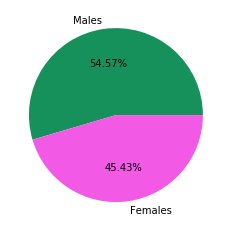

In [25]:
##plotting MALE and FEMALE  ratio
labels=["Males","Females"]
colors=["#16915c","#f25ae6"]
plt.pie(gender_pct,
        colors=colors,
        labels = labels,
         autopct="%0.2f%%"
       )            # after point. numbers
plt.show()

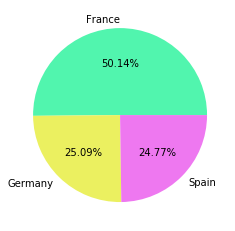

In [26]:
#Plotting GEOGRAPHICAL RATIO

labels=["France","Germany","Spain"]
colors=["#51f5ae","#ebf060","#ee78f0"]
plt.pie(geography_pct,
        colors=colors,
        labels = labels,
        autopct="%0.2f%%"
       )            # after point. numbers
plt.show()

In the dataset, there are more men (55%) than women (45%), and it has only 3 different countries: France, Spain, and Germany. Where 50% of the customers are from France and 25% are from Germany, and the other group are from Spain.

Now, let's just check the relationship between the features and the outcome ('Exited').


In [62]:
salary_min=dataset[dataset["EstimatedSalary"]<30000]
salary_min

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited_str,HasCrCard_str,IsActiveMember_str,NumOfProducts_str
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,Stayed,Has Credit Card,IsActiveMember,2
12,13,15632264,Kay,476,France,Female,34,10,0.00,2,1,0,26260.98,0,Stayed,Has Credit Card,Is_not_ActiveMember,2
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1,Exited,Has Credit Card,Is_not_ActiveMember,1
17,18,15788218,Henderson,549,Spain,Female,24,9,0.00,2,1,1,14406.41,0,Stayed,Has Credit Card,IsActiveMember,2
23,24,15725737,Mosman,669,France,Male,46,3,0.00,2,0,1,8487.75,0,Stayed,dont Has Credit Card,IsActiveMember,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9974,9975,15695474,Barker,583,France,Male,33,7,122531.86,1,1,0,13549.24,0,Stayed,Has Credit Card,Is_not_ActiveMember,1
9977,9978,15579969,Mancini,683,France,Female,32,9,0.00,2,1,1,24991.92,0,Stayed,Has Credit Card,IsActiveMember,2
9979,9980,15692664,Diribe,677,France,Female,58,1,90022.85,1,0,1,2988.28,0,Stayed,dont Has Credit Card,IsActiveMember,1
9987,9988,15588839,Mancini,606,Spain,Male,30,8,180307.73,2,1,1,1914.41,0,Stayed,Has Credit Card,IsActiveMember,2


In [74]:
salary_min_count=len(dataset[dataset["EstimatedSalary"]<30000])
salary_max_count=len(dataset[dataset["EstimatedSalary"]>30000])
print("persons sallery below 30,000 :- {}".format(salary_min_count))
print("persons sallery above 30,000 :- {}".format(salary_max_count))


persons sallery below 30,000 :- 1478
persons sallery below 30,000 :- 8522


In [76]:
salary_min_pct=salary_min_count/len(dataset.index)*100
salary_max_pct=salary_max_count/len(dataset.index)*100
print("(salary < 30,000) % :- {}".format(salary_min_pct))
print("(salary > 30,000) % :- {}".format(salary_max_pct))

(salary < 30,000) % :- 14.78
(salary > 30,000) % :- 85.22


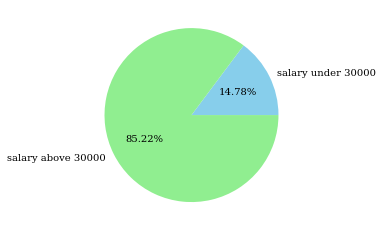

In [80]:
labels=["salary under 30000","salary above 30000"]
data=[salary_min_pct,salary_max_pct]
colors=["skyblue",'lightgreen']
plt.pie(data,labels=labels,colors=colors,autopct="%0.2f%%")
plt.show()

- Here we can see the salary Percentage of clients with salary more than 30,000 are 85% and below 30,000 are 15%

In [28]:

HasCrCard_count=dataset["HasCrCard"].value_counts() 
#return different categorical values of Hascreditcard/Dont_havecreditcards
HasCrCard_count

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [29]:
HasCrCard_pct=HasCrCard_count/len(dataset.index) *100    #(ratio)
HasCrCard_pct

1    70.55
0    29.45
Name: HasCrCard, dtype: float64

In [30]:
HasCrCard=pd.concat([HasCrCard_count,round(HasCrCard_pct,2)],axis=1).set_axis(['H_count','H_pct'],axis=1,inplace=False)
HasCrCard

,H_count,H_pct
1,7055,70.55
0,2945,29.45


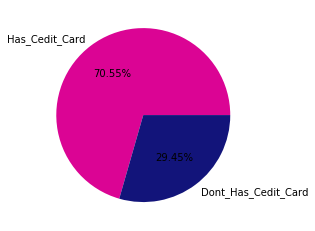

In [31]:
#Ratio of who has credit cards and who dont have credit cards
labels=["Has_Cedit_Card","Dont_Has_Cedit_Card"]
colors=["#db0494","#12147a"]
plt.pie(HasCrCard_pct,
        colors=colors,
        labels = labels,
        autopct="%0.2f%%")
plt.show()

- As we can see from this Pie chart From all the clients 71% clients has credit cards  and approx 29% dont has credit cards

###### Features and outcome(exited)

In [32]:
dataset.groupby(['Gender']).agg(["count"])
#count the values of all Numeric columns as per "gender" group.




,RowNumber,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited_str
,count,count,count,count,count,count,count,count,count,count,count,count,count,count
Gender,,,,,,,,,,,,,,
Female,4543,4543,4543,4543,4543,4543,4543,4543,4543,4543,4543,4543,4543,4543
Male,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457


In [33]:
dataset.groupby(['Gender']).agg(["max"])

#MAX values of all Numeric columns as per "gender" group.

,RowNumber,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited_str
,max,max,max,max,max,max,max,max,max,max,max,max,max,max
Gender,,,,,,,,,,,,,,
Female,10000,15815690,Zuyeva,850,Spain,85,10,238387.56,4,1,1,199992.48,1,Stayed
Male,9999,15815645,Zuyeva,850,Spain,92,10,250898.09,4,1,1,199953.33,1,Stayed


In [34]:
df = dataset.groupby(['Gender','Exited']).agg(["count"])
#count all the vales as per gender and exited croup separately
df

RowNumber CustomerId Surname CreditScore Geography   Age Tenure  \
                  count      count   count       count     count count  count   
Gender Exited                                                                   
Female 0           3404       3404    3404        3404      3404  3404   3404   
       1           1139       1139    1139        1139      1139  1139   1139   
Male   0           4559       4559    4559        4559      4559  4559   4559   
       1            898        898     898         898       898   898    898   

              Balance NumOfProducts HasCrCard IsActiveMember EstimatedSalary  \
                count         count     count          count           count   
Gender Exited                                                                  
Female 0         3404          3404      3404           3404            3404   
       1         1139          1139      1139           1139            1139   
Male   0         4559          4559      4559           4559            4559   
       1          898           898       898            898             898   

              Exited_str  
                   count  
Gender Exited             
Female 0            3404  
       1            1139  
Male   0            4559  
       1             898

In [35]:
df = dataset.groupby(['Gender','Exited'])['Exited'].agg(["count"])
#count the vlue of column "Exited" as per Gender and Exited group
df

count
Gender Exited       
Female 0        3404
       1        1139
Male   0        4559
       1         898

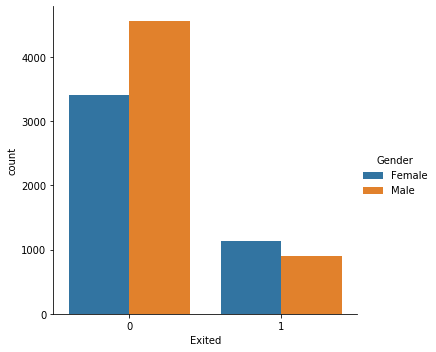

In [36]:
sns.catplot('Exited',data=dataset,kind="count",hue="Gender")

- From this catplot we can understand that from Exitd Clients the number of female are little bit more than males 

In [37]:
temp=dataset.groupby(['Gender'])['Exited'].agg(["count"])
temp

,count
Gender,
Female,4543
Male,5457


In [38]:
def count_by_group(data, feature, target):
    df = data.groupby([feature, target])[target].agg(['count'])
    temp = data.groupby([feature])[target].agg(['count'])
    df['pct'] = 100 * df.div(temp, level = feature).reset_index()['count'].values
    return df.reset_index()

In [39]:
count_by_group(dataset, feature="Gender", target='Exited')

,Gender,Exited,count,pct
0,Female,0,3404,74.928461
1,Female,1,1139,25.071539
2,Male,0,4559,83.544072
3,Male,1,898,16.455928


In [40]:
count_by_group(dataset, feature="Geography", target='Exited')

,Geography,Exited,count,pct
0,France,0,4204,83.845233
1,France,1,810,16.154767
2,Germany,0,1695,67.556796
3,Germany,1,814,32.443204
4,Spain,0,2064,83.326605
5,Spain,1,413,16.673395


In [41]:
!pip install pySankey

In [42]:
from pySankey.sankey import sankey

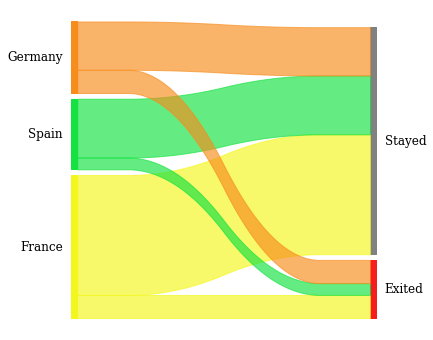

In [43]:
colorDict = {
    'Exited':'#f71b1b',
    'Stayed':'grey',
    'France':'#f3f71b',
    'Spain':'#12e23f',
    'Germany':'#f78c1b'
}
sankey(dataset['Geography'], dataset['Exited_str'],
       aspect=20, colorDict=colorDict,
       fontsize=12,figure_name="Geography")

In [44]:
HasCrCard_count=dataset["HasCrCard"].value_counts() 
HasCrCard_count

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [45]:
HasCrCard_pct=HasCrCard_count/len(dataset.index) *100   
HasCrCard_pct

1    70.55
0    29.45
Name: HasCrCard, dtype: float64

In [46]:
HasCrCard=pd.concat([HasCrCard_count,HasCrCard_pct],axis=1).set_axis(['H_count','H_pct'],axis=1,inplace=False)
HasCrCard

,H_count,H_pct
1,7055,70.55
0,2945,29.45


In [47]:
count_by_group(dataset, feature = "HasCrCard",target = "Exited")

,HasCrCard,Exited,count,pct
0,0,0,2332,79.185059
1,0,1,613,20.814941
2,1,0,5631,79.815734
3,1,1,1424,20.184266


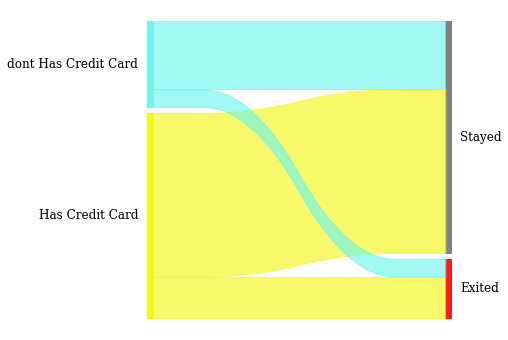

In [48]:
dataset["HasCrCard_str"]=dataset['HasCrCard'].map({1:"Has Credit Card", 0:"dont Has Credit Card"})
colorDict = {
    'Exited':'#f71b1b',
    'Stayed':'grey',
    "Has Credit Card":'#f3f71b',
    "dont Has Credit Card":'#71f5ec'}
  
sankey(dataset['HasCrCard_str'], dataset['Exited_str'],
       aspect=20, colorDict=colorDict,
       fontsize=12,figure_name="HasCrCard_str")

In [49]:
IsActiveMember_count=dataset["IsActiveMember"].value_counts() 
IsActiveMember_count

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [50]:
IsActiveMember_pct=IsActiveMember_count/len(dataset.index) *100   
IsActiveMember_pct

1    51.51
0    48.49
Name: IsActiveMember, dtype: float64

In [51]:
IsActiveMember=pd.concat([IsActiveMember_count,IsActiveMember_pct],axis=1).set_axis(['I_count','I_pct'],axis=1,inplace=False)
IsActiveMember

,I_count,I_pct
1,5151,51.51
0,4849,48.49


In [52]:
count_by_group(dataset, feature = "IsActiveMember",target = "Exited")

,IsActiveMember,Exited,count,pct
0,0,0,3547,73.149103
1,0,1,1302,26.850897
2,1,0,4416,85.730926
3,1,1,735,14.269074


In [53]:
dataset["IsActiveMember_str"]=dataset['IsActiveMember'].map({1:"IsActiveMember", 0:"Is_not_ActiveMember"})


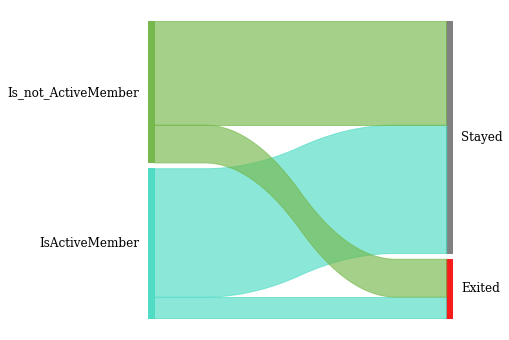

In [54]:
colorDict = {
    'Exited':'#f71b1b',
    'Stayed':'grey',
    "IsActiveMember":'#4ddbc4',
    "Is_not_ActiveMember":'#75b84b',
    
}
sankey(dataset['IsActiveMember_str'], dataset['Exited_str'],
       aspect=20, colorDict=colorDict,
       fontsize=12,figure_name="IsActiveMember_str")

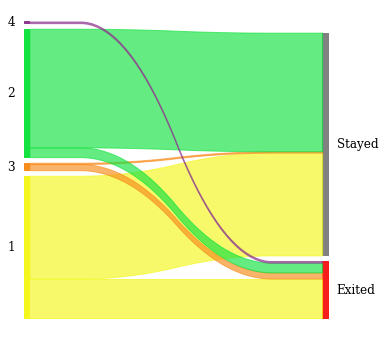

In [55]:

NumOfProducts_count = dataset['NumOfProducts'].value_counts()
NumOfProducts_pct= NumOfProducts_count / len(dataset.index)

NumOfProducts = pd.concat([NumOfProducts_count, round(NumOfProducts_pct,2)], axis=1)\
        .set_axis(['count', 'pct'], axis=1, inplace=False)
NumOfProducts


# STEP 2
count_by_group(dataset, feature = 'NumOfProducts', target = 'Exited')



# STEP 3
dataset['NumOfProducts_str'] = dataset['NumOfProducts'].map({1: '1', 2: '2', 3: '3', 4: '4'})

# STEP 4

colorDict = {
    'Exited':'#f71b1b',
    'Stayed':'grey',
    '1':'#f3f71b',
    '2':'#12e23f',
    '3':'#f78c1b',
    '4':'#8E388E'
}
sankey(
    dataset['NumOfProducts_str'], dataset['Exited_str'], aspect=20, colorDict=colorDict,
    fontsize=12, figure_name="NumOfProducts")

In [56]:
dataset[(dataset["Exited"]==0)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited_str,HasCrCard_str,IsActiveMember_str,NumOfProducts_str
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Stayed,dont Has Credit Card,IsActiveMember,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Stayed,dont Has Credit Card,Is_not_ActiveMember,2
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Stayed,Has Credit Card,IsActiveMember,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,Stayed,Has Credit Card,IsActiveMember,2
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,Stayed,dont Has Credit Card,IsActiveMember,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0,Stayed,Has Credit Card,Is_not_ActiveMember,1
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0,Stayed,dont Has Credit Card,Is_not_ActiveMember,2
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Stayed,Has Credit Card,Is_not_ActiveMember,2
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Stayed,Has Credit Card,IsActiveMember,1


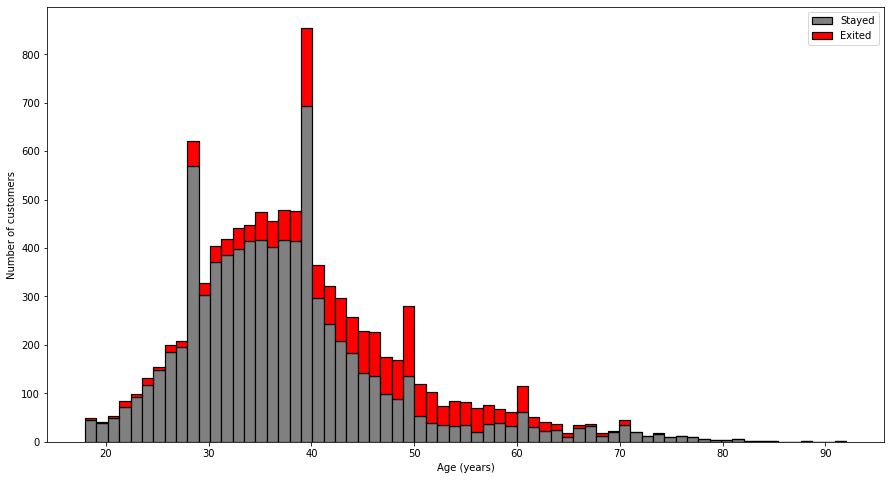

In [4]:
figure = plt.figure(figsize=(15,8))
plt.hist([
        dataset[(dataset.Exited==0)]['Age'],
        dataset[(dataset.Exited==1)]['Age']
        ], 
         stacked=True, color = ['grey','r'],
         bins = 'auto',label = ['Stayed','Exited'],
         edgecolor='black', linewidth=1.2)
plt.xlabel('Age (years)')
plt.ylabel('Number of customers')
plt.legend()

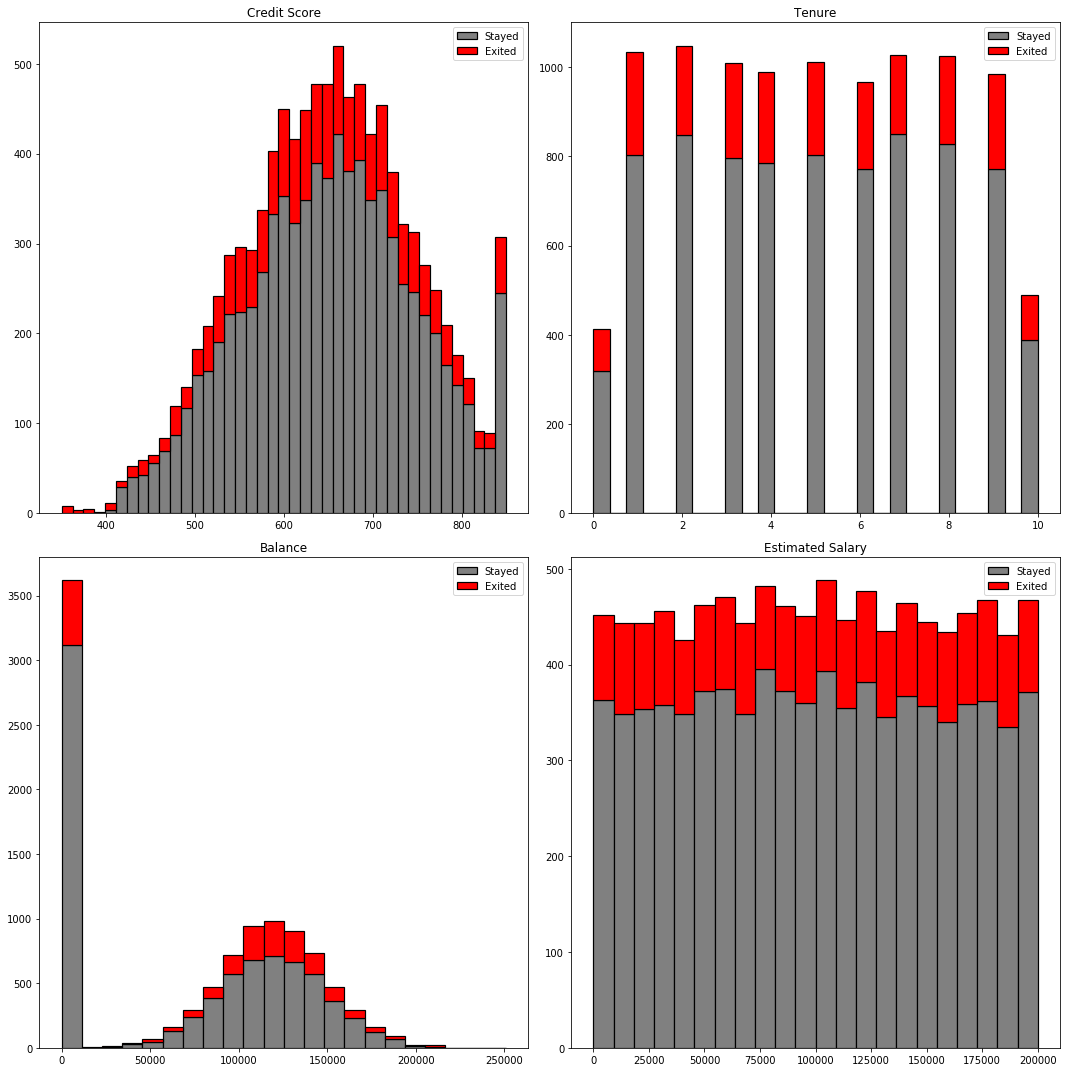

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (15,15))
fig.subplots_adjust(left=0.2, wspace=0.6)
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.hist([
        dataset[(dataset.Exited==0)]['CreditScore'],
        dataset[(dataset.Exited==1)]['CreditScore']
        ], 
         stacked=True, color = ['grey','r'],
         bins = 'auto',label = ['Stayed','Exited'],
         edgecolor='black', linewidth=1.2)
ax0.legend()
ax0.set_title('Credit Score')

ax1.hist([
        dataset[(dataset.Exited==0)]['Tenure'],
        dataset[(dataset.Exited==1)]['Tenure']
        ], 
         stacked=True, color = ['grey','r'],
         bins = 'auto',label = ['Stayed','Exited'],
         edgecolor='black', linewidth=1.2)
ax1.legend()
ax1.set_title('Tenure')

ax2.hist([
        dataset[(dataset.Exited==0)]['Balance'],
        dataset[(dataset.Exited==1)]['Balance']
        ], 
         stacked=True, color = ['grey','r'],
         bins = 'auto',label = ['Stayed','Exited'],
         edgecolor='black', linewidth=1.2)
ax2.legend()
ax2.set_title('Balance')

ax3.hist([
        dataset[(dataset.Exited==0)]['EstimatedSalary'],
        dataset[(dataset.Exited==1)]['EstimatedSalary']
        ], 
         stacked=True, color = ['grey','r'],
         bins = 'auto',label = ['Stayed','Exited'],
         edgecolor='black', linewidth=1.2)
ax3.legend()
ax3.set_title('Estimated Salary')

fig.tight_layout()
plt.show()

From the tables and plots above, we can have some insights:

1. As for gender, `women are lower in number` than the men, but have a `higher rate to close` the account.
2. There is a `higher rate of exited clients in Germany `(32%, which is about 2x higher), and `lower in Spain` and France (around 16% each).
3. On age, `customer below 40 and above 65` years old have a `tendency to keep their account`.
4. Has or not `credit card does not impact on the decision` to stay in the bank (both groups has 20% of exited customers)
5. Non active members tend to discontinue their services with a bank compared with the active clients (27% vs 14%). 
6. The dataset has 96% of clients  with 1 or 2 product, and `customers with 1 product only have a higher rate to close the account` than those with 2 products (around 3x higher).
7. Estimated `Salary does not seem to affect` the churn rate